# Importando pacotes necessários

In [1]:
# O primeiro passo para a construção do modelo de precificação é importar as bibliotecas:
# - Pandas para o processamento de dados;
# - Matplotlib e Seaborn para visualização de dados;
# - Scikit-learn para construir e avaliar o modelo de machine learning.

# Importando Bibliotecas

import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sns.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

In [2]:
# Para importar os dados da base fornecida usarei a função "read_csv" da biblioteca Pandas.
# A função "head" permite uma primeira "olhada" em nossos dados, por definição, trazendo as 5 primeiras linhas de nosso DataFrame


# Importando dados

df = pd.read_csv("C:\\Users\\paula.d.cavalheiro\\Desktop\\KeyCash\\datasets\\Desafio2_input.csv", sep=';')
df.head()

,Id,Zona,Area,Qualidade,AnoConstrucao,QualidadeAquecimento,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco
0,1,RL,9600,6,1976,Ex,2,3,4,6,1,2,181500
1,2,RL,14115,5,1993,Ex,1,1,2,5,0,2,143000
2,3,RL,11200,5,1965,Ex,1,3,4,5,0,1,129500
3,4,RL,12968,5,1962,TA,1,2,3,4,0,1,144000
4,5,RL,10920,6,1960,TA,1,2,3,5,1,1,157000


In [3]:
# Para iniciar o processo de análise exploratória de dados (EDA) vamos analisar se existe necessidade
# de exclusão dos valores nulos através da função 'dropna'.

print(df.isnull().sum()) # check if there are null values
# df.dropna(inplace = True)

Id                      0
Zona                    0
Area                    0
Qualidade               0
AnoConstrucao           0
QualidadeAquecimento    0
Banheiros               0
Quartos_t1              0
Quartos_t2              0
Comodos                 0
Lareiras                0
Garagem                 0
Preco                   0
dtype: int64


In [4]:
# Através da função 'describe' obteremos uma visão estatística dos dados como a média, mediana, desvio padrão, entre outros.

df.describe()

,Id,Area,Qualidade,AnoConstrucao,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,8932.025437,5.642289,1974.421304,1.370429,2.651828,3.651828,5.782194,0.515103,1.608903,148234.538951
std,181.72094,3318.885535,0.892748,19.189939,0.483304,0.551129,0.551129,1.039936,0.601361,0.577980,28088.037518
min,1.00000,1300.000000,4.000000,1940.000000,1.000000,1.000000,2.000000,3.000000,0.000000,0.000000,80000.000000
25%,158.00000,7420.000000,5.000000,1959.000000,1.000000,2.000000,3.000000,5.000000,0.000000,1.000000,129000.000000
50%,315.00000,9000.000000,6.000000,1971.000000,1.000000,3.000000,4.000000,6.000000,0.000000,2.000000,147000.000000
75%,472.00000,10530.000000,6.000000,1993.000000,2.000000,3.000000,4.000000,6.000000,1.000000,2.000000,173000.000000
max,629.00000,19900.000000,8.000000,2009.000000,2.000000,3.000000,4.000000,8.000000,2.000000,3.000000,200000.000000


In [5]:
# A última etapa do processo de EDA será verificar os tipos de dados, caso haja alguma variável
# tipo float ou objeto, é necessário converte-la para o tipo inteiro.

print(df.dtypes)

Id                       int64
Zona                    object
Area                     int64
Qualidade                int64
AnoConstrucao            int64
QualidadeAquecimento    object
Banheiros                int64
Quartos_t1               int64
Quartos_t2               int64
Comodos                  int64
Lareiras                 int64
Garagem                  int64
Preco                    int64
dtype: object


In [6]:
# O método replace será usado para transformar os insumos da coluna 'Zona', as siglas Rl e RM, em valores numéricos
# A função "astype" é usada para lançar um objeto pandas para um tipo de dados especifico, int nesse caso.

df["Zona"].replace({"RL": "0", "RM": "1"}, inplace=True)
df['Zona'] = df['Zona'].astype('int64')

In [7]:
# O método replace será usado para transformar a Qualidade do sistema de aquecimento em valores numéricos, sendo:
# Ex - Excelente = 3
# Gd - Bom = 2
# TA - Mediano = 1
# Fa - Aceitável = 0

# A função "astype" é usada para lançar um objeto pandas para um tipo de dados especifico, int nesse caso.

df["QualidadeAquecimento"].replace({"Ex": "3", "Gd": "2","TA": "1", "Fa": "0"}, inplace=True)
df['QualidadeAquecimento'] = df['QualidadeAquecimento'].astype('int64')

In [8]:
# Verificação se todos os tipos de dados são int.

print(df.dtypes)

Id                      int64
Zona                    int64
Area                    int64
Qualidade               int64
AnoConstrucao           int64
QualidadeAquecimento    int64
Banheiros               int64
Quartos_t1              int64
Quartos_t2              int64
Comodos                 int64
Lareiras                int64
Garagem                 int64
Preco                   int64
dtype: object


# Visualização de dados

In [9]:
# Scatter plot

y_var = 'Preco'
scatter_df = df.drop( y_var, axis = 1)
i = df.columns

c:\users\paula.d.cavalheiro\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


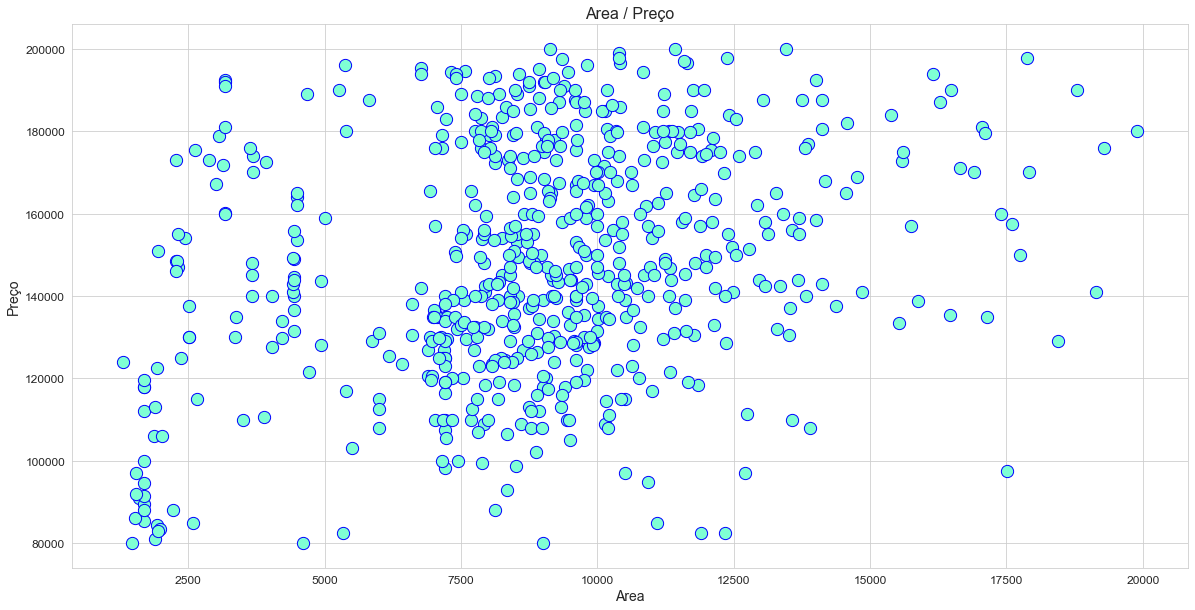

In [36]:
plotArea = sns.scatterplot(i[2], y_var, data = df, color = 'aquamarine', edgecolor = 'b', s = 150)
plt.title('{} / Preço'.format(i[2]), fontsize = 16)
plt.xlabel('{}'.format(i[2]), fontsize = 14)
plt.ylabel('Preço', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

<AxesSubplot:xlabel='Qualidade', ylabel='Count'>

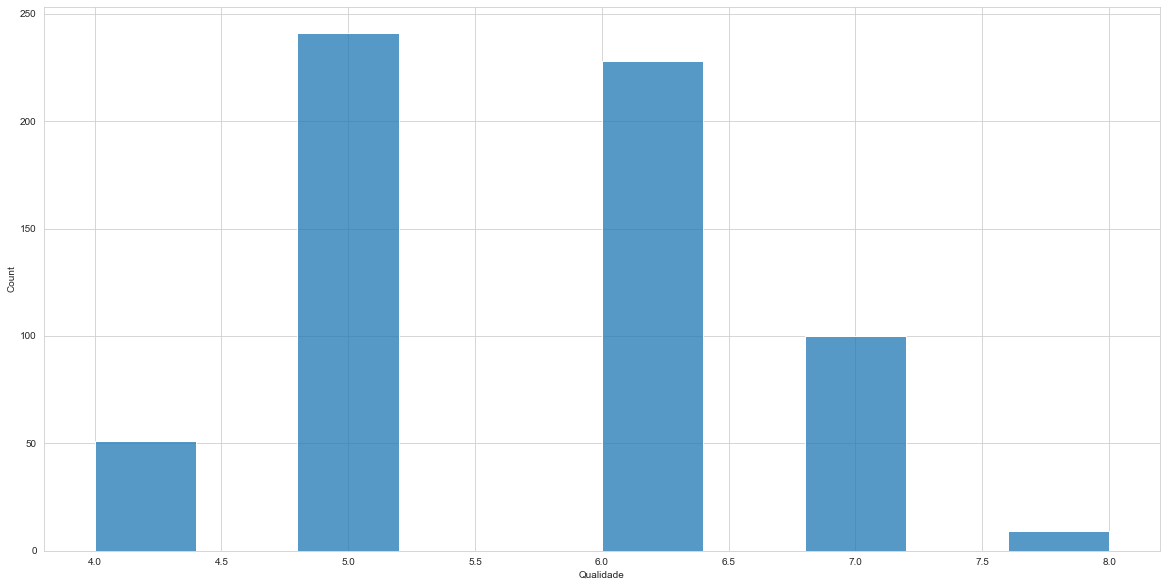

In [12]:
sns.histplot( df.Qualidade, kde=False, bins=10)


c:\users\paula.d.cavalheiro\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


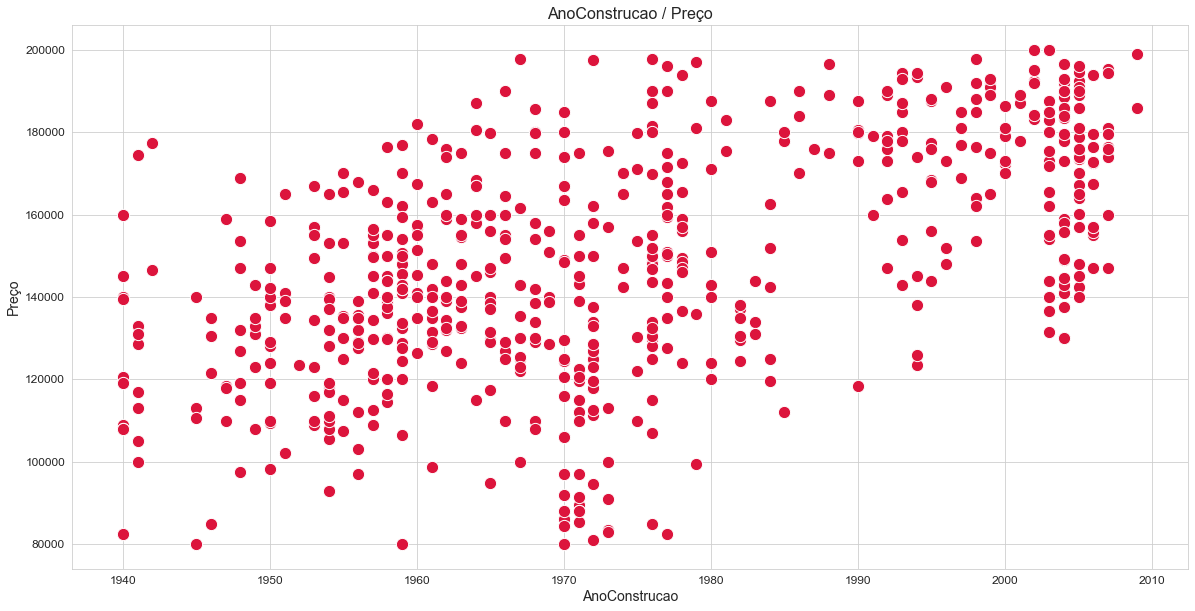

In [35]:
plotAnoConstrução = sns.scatterplot(i[4], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
plt.title('{} / Preço'.format(i[4]), fontsize = 16)
plt.xlabel('{}'.format(i[4]), fontsize = 14)
plt.ylabel('Preço', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

<AxesSubplot:xlabel='QualidadeAquecimento', ylabel='Count'>

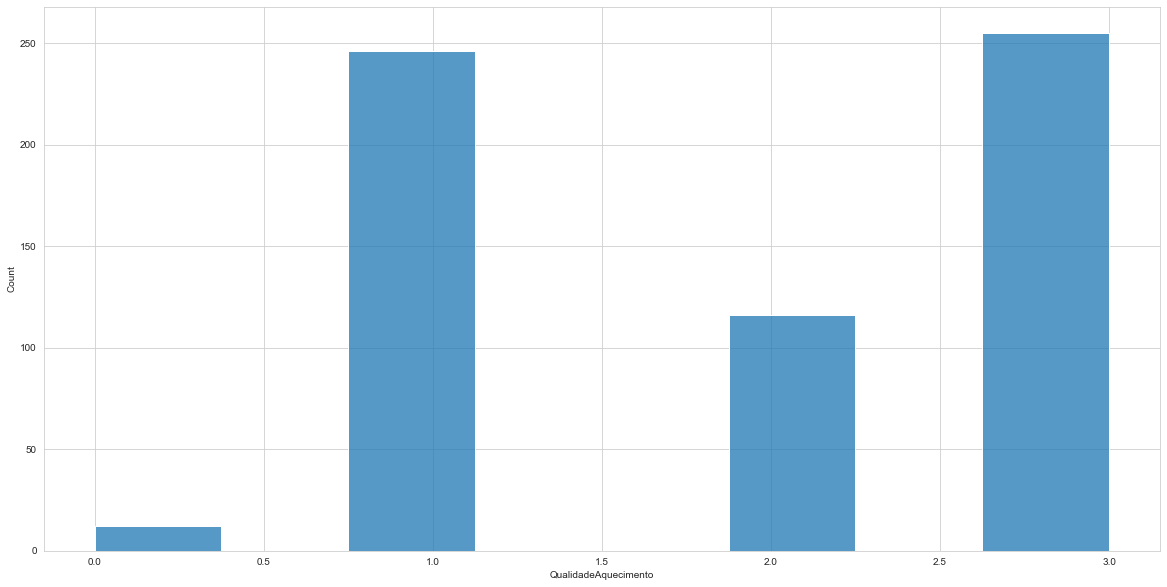

In [15]:
sns.histplot( df.QualidadeAquecimento, kde=False, bins=8)

<AxesSubplot:xlabel='Banheiros', ylabel='Count'>

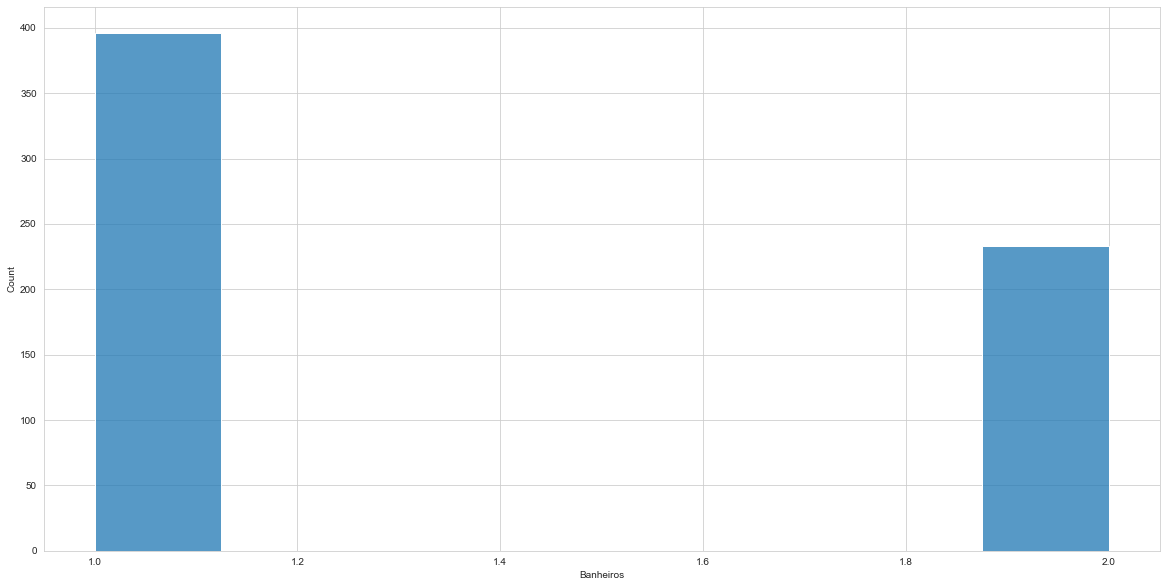

In [16]:
sns.histplot( df.Banheiros, kde=False, bins=8)

<AxesSubplot:xlabel='Quartos_t1', ylabel='Count'>

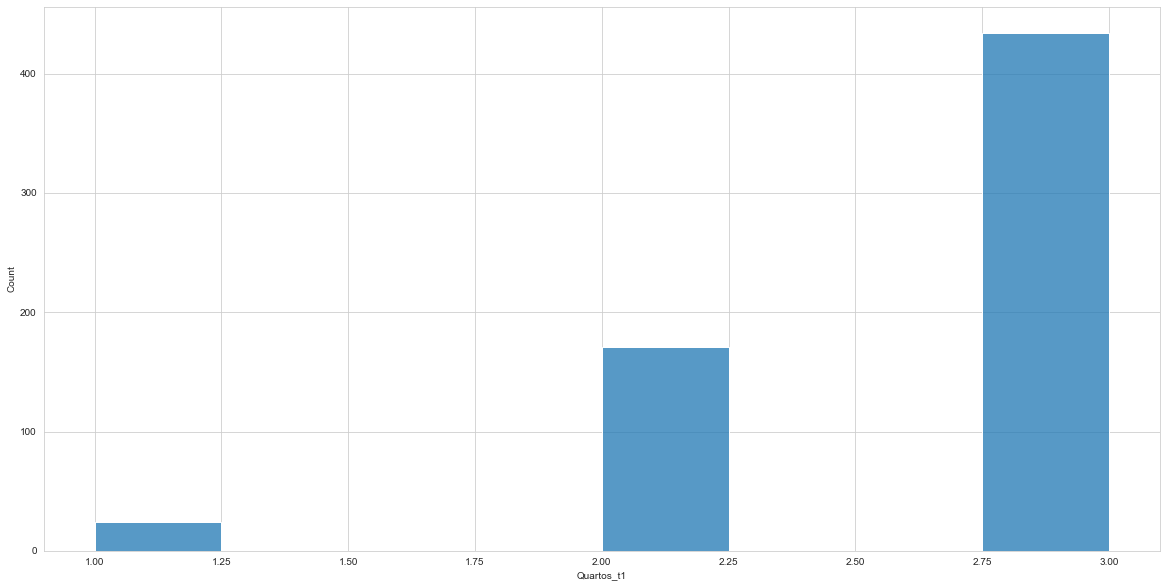

In [17]:
sns.histplot( df.Quartos_t1, kde=False, bins=8)

<AxesSubplot:xlabel='Quartos_t2', ylabel='Count'>

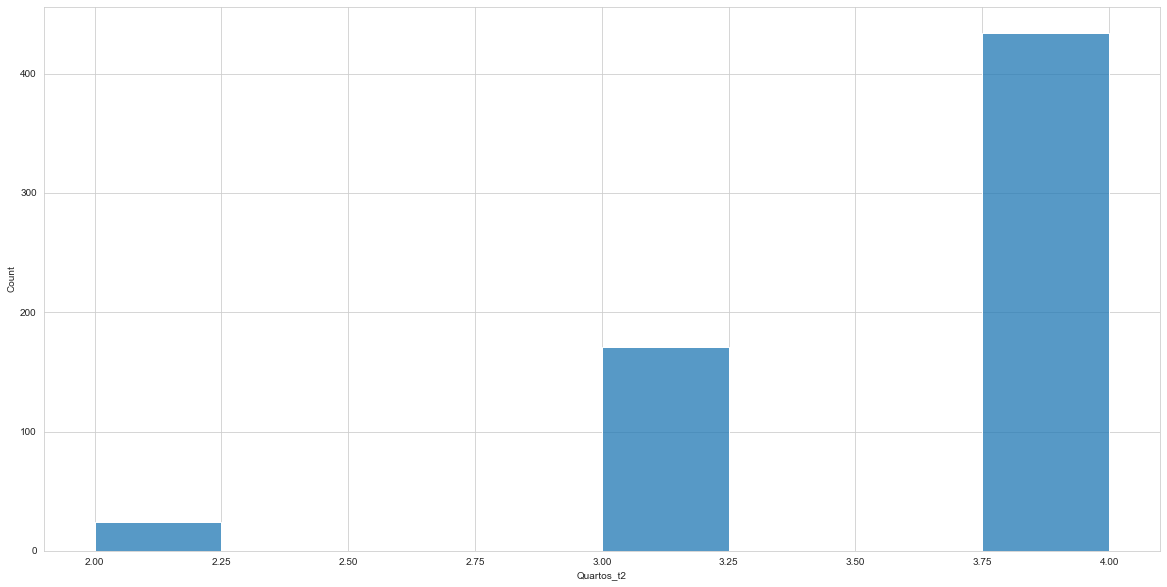

In [23]:
sns.histplot( df.Quartos_t2, kde=False, bins=8)

<AxesSubplot:xlabel='Comodos', ylabel='Count'>

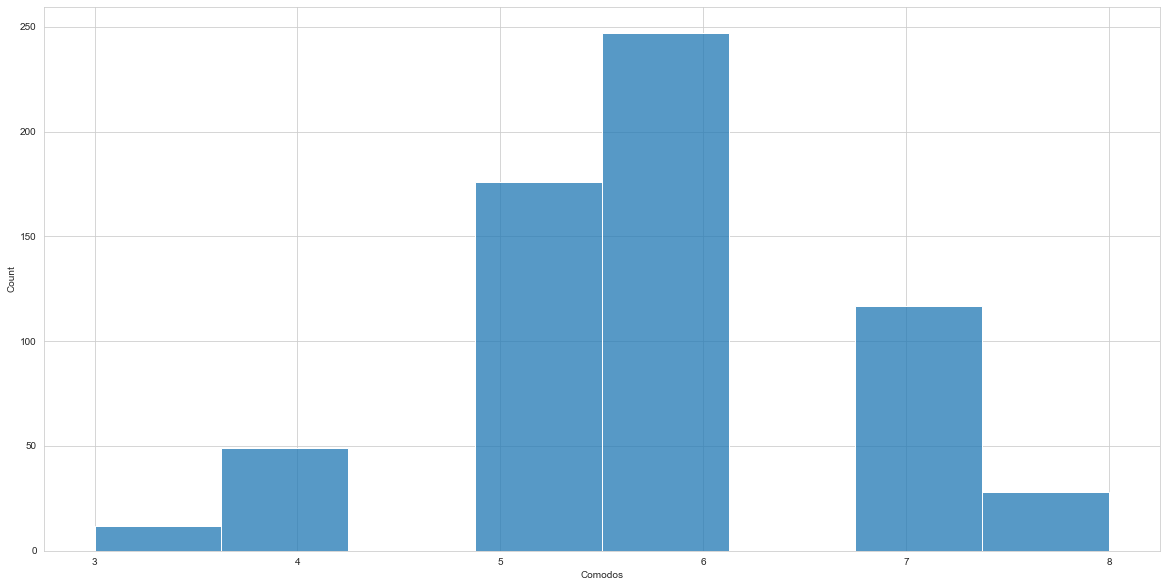

In [24]:
sns.histplot( df.Comodos, kde=False, bins=8)

<AxesSubplot:xlabel='Lareiras', ylabel='Count'>

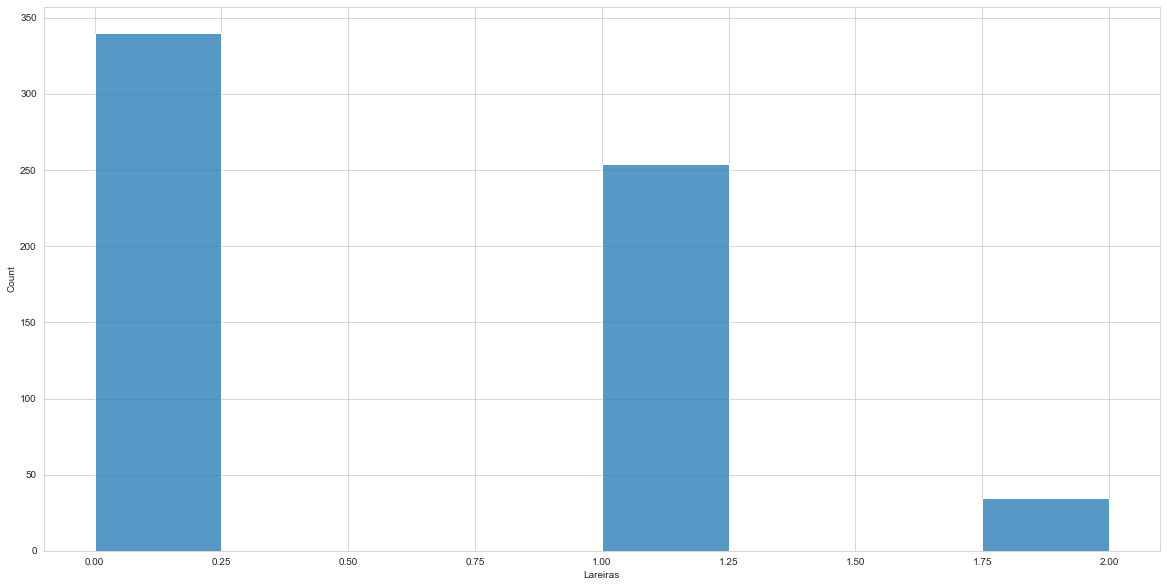

In [25]:
sns.histplot( df.Lareiras, kde=False, bins=8)

<AxesSubplot:xlabel='Garagem', ylabel='Count'>

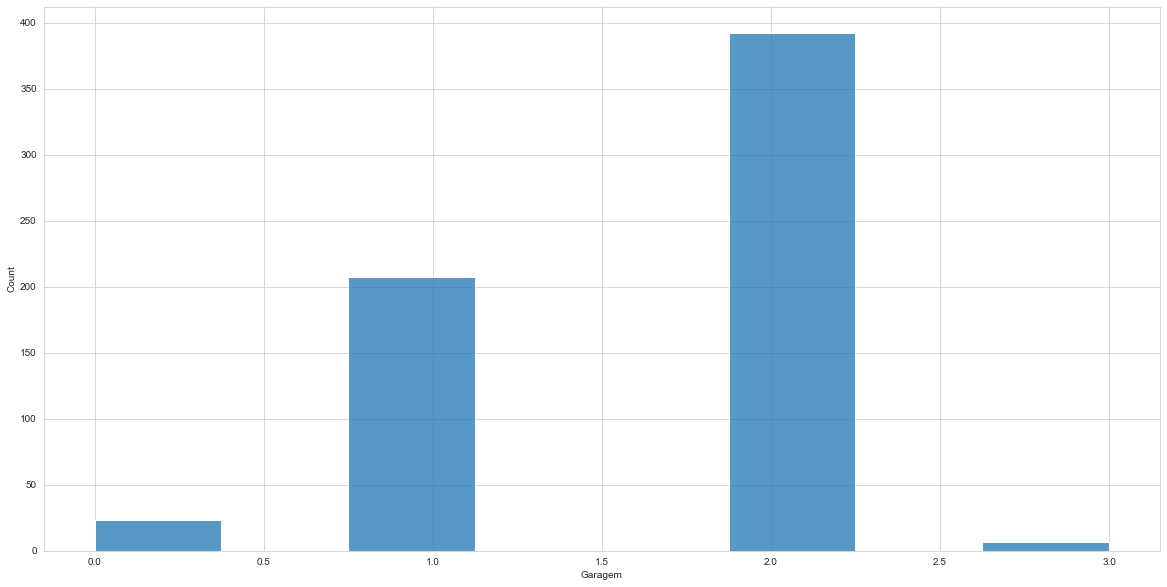

In [26]:
sns.histplot( df.Garagem, kde=False, bins=8)

# Seleção e Divisão de Dados

In [27]:
# O próximo passo é selecionar e definir as variáveis dependentes e independentes além de dividi-las em
# conjuntos de treino e teste.

# Definirei a variável 'X' (variável independente) e a variável 'Y' (variável independente).

X_var = df[['Zona', 'Area', 'Qualidade', 'AnoConstrucao', 'QualidadeAquecimento', 'Banheiros',
            'Quartos_t1', 'Quartos_t2', 'Comodos', 'Lareiras', 'Garagem']].values
y_var = df['Preco'].values

# Após defini-las, iremos devidi-las em um conjunto de teste e outro de treino.

# A divisão será feita usando a função 'train_test_split' do scikit-learn.

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print('X_train samples : ', X_train[0:5])
print('X_test samples : ', X_test[0:5])
print('y_train samples : ', y_train[0:5])
print('y_test samples : ', y_test[0:5])


X_train samples :  [[    0  7332     6  1959     3     1     2     3     4     0     1]
 [    0  9320     4  1959     0     1     3     4     6     0     0]
 [    0 13695     5  2004     3     1     3     4     6     0     2]
 [    1  4500     6  1998     3     2     2     3     5     0     2]
 [    0 10364     6  1995     2     2     3     4     7     1     2]]
X_test samples :  [[   1 1526    4 1970    1    1    1    2    3    0    1]
 [   0 7750    7 2003    3    2    3    4    6    0    2]
 [   0 8724    5 1968    2    1    3    4    5    1    2]
 [   0 9600    7 1969    1    1    3    4    6    0    2]
 [   1 4435    6 2003    3    1    1    2    3    0    2]]
y_train samples :  [120000 128950 159000 164000 168000]
y_test samples :  [ 86000 162000 129000 140000 131500]


# Modelando

In [ ]:
# Iremos construir e treinar cinco tipos diferentes de modelos de regressão linear:
#   1 - OLS;
#   2 - Modelo de Regressão Ridge;
#   3 - Modelo de Regressão Lasso;
#   4 - Modelo de Regressão Bayesian;
#   5 - Modelo de Regressão Elastic Net.

# Usaremos os algoritmos fornecidos pelo Scikit-learn.

# Em todos eles definiremos uma variável para armazenar o algoritmo do modelo, ajustamos
# as variáveis do conjunto de treino e fazemos algumas previsões no conjunto de teste.

In [28]:
# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

ols_yhat

array([ 89659.06479529, 177078.65611221, 141761.31439295, 155620.43667264,
       136078.40559486, 129616.52377016, 176493.00549963, 183804.07649836,
       185248.96771395, 125886.06408119, 174890.13749621, 114885.29917311,
       167399.5323809 , 141500.8067653 , 106393.76096354, 154024.10199599,
       153906.47873167, 147030.22849887, 137375.49907156, 149755.63308596,
       175621.6137276 , 136078.40559486, 141135.39968042, 178982.53911093,
       176791.97378353, 127856.88186058, 166414.56869663, 179312.69954807,
       131090.06273148, 180347.93059562, 182101.42325552, 177566.5860745 ,
       176494.94531601, 131027.88626227, 150892.99753895, 126626.89234218,
       126963.7045187 , 170247.59985018, 128758.16048358, 149743.13556746,
       178575.17659564, 150431.48808549, 177778.05160903, 164436.2159866 ,
       109367.12538413, 160927.46482543, 124867.62854318, 111821.39719613,
       146913.17574967, 133779.87136086,  91962.09554434, 178712.11096689,
       181027.11921875, 1

In [29]:
# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

ridge_yhat

array([ 89721.4421983 , 177048.39730417, 141740.4688164 , 155616.59043692,
       136168.81695781, 129660.38927837, 176409.15179034, 183806.60677587,
       185233.49039823, 125911.41485129, 174874.56768223, 114978.02887952,
       167363.56647928, 141592.53494266, 106512.93731996, 154071.60646402,
       153877.0361464 , 147100.14039591, 137389.23518975, 149774.9248428 ,
       175592.55357912, 136168.81695781, 141193.22778707, 178893.75507772,
       176759.98030857, 127891.9831675 , 166345.59443547, 179284.19025282,
       131081.48143586, 180333.82179721, 182078.69498363, 177521.04178629,
       176469.74445273, 130970.96270761, 150848.96537352, 126655.9554681 ,
       126968.66077829, 170234.54633527, 128788.90650306, 149792.32402893,
       178552.16369492, 150461.58253345, 177700.6070702 , 164369.21151333,
       109457.58939977, 161015.52894845, 124845.12855197, 111859.27274759,
       146983.57029625, 133792.88625156,  92117.44827575, 178689.82064979,
       181024.67094271, 1

In [30]:
# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

lasso_yhat

array([ 89659.09945216, 177078.65555215, 141761.32359918, 155620.46905892,
       136078.47300519, 129616.60575317, 176492.89146709, 183804.04064307,
       185248.96767239, 125886.12863263, 174890.11473019, 114885.38121098,
       167399.49209066, 141500.86378856, 106393.93226472, 154024.14947194,
       153906.45746934, 147030.30753386, 137375.53273062, 149755.63989629,
       175621.57311124, 136078.47300519, 141135.437594  , 178982.45124924,
       176791.96840746, 127856.95527694, 166414.4666571 , 179312.61573798,
       131090.02930642, 180347.94446697, 182101.39931234, 177566.5374956 ,
       176494.90348307, 131027.82250599, 150892.96136794, 126626.96075147,
       126963.72379999, 170247.60363188, 128758.20677507, 149743.13089479,
       178575.18100489, 150431.52346277, 177777.94393044, 164436.13992396,
       109367.18736549, 160927.55941894, 124867.5855633 , 111821.46920974,
       146913.24031652, 133779.90952666,  91962.24681154, 178712.11649496,
       181027.10144931, 1

In [31]:
# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

bayesian_yhat

array([ 90349.58628598, 176747.49049236, 141527.37476327, 155565.93926033,
       137047.14168908, 130141.10301547, 175571.90240476, 183822.96199965,
       185069.57835384, 126200.16596469, 174721.12915378, 115882.16743702,
       166985.39476551, 142475.99483275, 107686.372704  , 154525.79664225,
       153553.09032543, 147814.33318827, 137546.41424918, 150012.48764416,
       175297.33898291, 137047.14168908, 141797.38489392, 177988.48795916,
       176427.1747691 , 128280.45102968, 165643.74739284, 178962.84429114,
       131023.46665334, 180196.97733453, 181837.60098294, 177029.59935638,
       176193.34154432, 130402.91657694, 150399.70850619, 126984.78209101,
       127045.84515452, 170099.04883484, 129124.80968212, 150285.21249457,
       178318.28424139, 150754.02960766, 176931.20633644, 163705.49616925,
       110318.24088697, 161845.95540022, 124637.71761306, 112292.93407517,
       147655.41121133, 133944.65424982,  93687.70948738, 178465.34991842,
       180995.71844267, 1

In [32]:
# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

en_yhat

array([ 89961.37294147, 176932.56943288, 141659.70645801, 155599.93580858,
       136511.44335662, 129835.63920253, 176087.68118954, 183814.85195337,
       185172.61679062, 126014.49412049, 174815.19094975, 115330.05350245,
       167222.4724232 , 141938.91902062, 106967.14854482, 154250.41778524,
       153759.26650443, 147370.88514465, 137445.30320073, 149856.32984735,
       175480.27927311, 136511.44335662, 141419.4707492 , 178550.28799009,
       176635.07482423, 128032.84081145, 166079.14600867, 179168.73659822,
       131053.15362818, 180280.38383061, 181989.25492521, 177340.36938667,
       176368.98471906, 130752.71081164, 150678.49371837, 126773.76943285,
       126992.2648874 , 170183.5800035 , 128911.59065633, 149981.26369213,
       178463.23241182, 150575.65289195, 177404.35213688, 164113.07040336,
       109797.38256376, 161345.13267926, 124761.69370031, 112013.68685929,
       147248.24963228, 133846.48159798,  92716.29908274, 178604.02506814,
       181014.52339868, 1

In [ ]:
# Construímos com sucesso cinco modelos de regressão linear diferentes.
# Para saber qual o modelo é o mais adequado aos nossos dados podemos avaliar
# 'explained_variance_score' e 'r2_score'  fornecidas pelo Scikit-learn.

# Tratando da métrica 'explained_variance_score' a pontuação deve ser superior a 0,60.

# Enquanto a métrica 'r2_score'  é uma medida do quão bem a variável dependente explica
# a variância da variável independente, esta deve ser superior a 0,70.

# Iremos comparar as pontuações métricas de cada modelo e escolher o modelo mais adequado para
# nosso conjunto de dados.

In [33]:
#Pontuação de Variância Explicada

print('EXPLAINED VARIANCE SCORE:')
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.7408710727763437
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.7410668994478722
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.7408713144872467
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.7426701734505683
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.7417590828002085
-------------------------------------------------------------------------------


In [ ]:
# Podemos notar que a pontuaçao de cada modelo atingiu ao menos 0,74 (ou 74%),
# ou seja, o modelo possui um bom desempenho.

# O melhor modelo foi o Bayesian, seguido pelo Elastic Net.

# A seguir passaremos para a métrica de avaliação final.

In [34]:
#R-squared

print('R-SQUARED:')
print('-------------------------------------------------------------------------------')
print('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)))
print('-------------------------------------------------------------------------------')
print('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)))
print('-------------------------------------------------------------------------------')
print('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)))
print('-------------------------------------------------------------------------------')
print('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)))
print('-------------------------------------------------------------------------------')
print('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.7406820117454833
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.7408721576012716
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.7406822465761027
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.7424121059050277
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.7415414624543396
-------------------------------------------------------------------------------


In [ ]:
# O modelo de regressão Bayesian segue com o valor mais alto, reforçando ser o mais adequado para nosso conjunto de dados.
